In [29]:
import pandas as pd
import bibtexparser
import matplotlib.pyplot as plt

In [3]:
with open('../references.bib') as bibfile:
    bib_database = bibtexparser.load(bibfile)

In [7]:
df = pd.DataFrame(bib_database.entries)
df.head()

,keywords,archiveprefix,abstract,urldate,primaryclass,eprint,journal,month,year,author,...,series,editor,booktitle,address,langid,url,isbn,school,type,howpublished
0,"and Cluster Computing,Computer Science - Artif...",arXiv,TensorFlow is a machine learning system that o...,2020-09-20,cs.DC,1605.08695,arXiv e-prints,May,2016,"Abadi, Mart{\'i}n and Barham, Paul and Chen, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"asteroseismology,planetary systems,stars: indi...",NaN,"We report the discovery of a warm sub-Saturn, ...",2021-03-16,NaN,NaN,\mnras,April,2021,"Addison, Brett C. and Wright, Duncan J. and Ni...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"asteroseismology,Astrophysics - Astrophysics o...",NaN,We introduce the public version of the BAyesia...,2023-03-22,NaN,NaN,\mnras,January,2022,"{Aguirre B{\o}rsen-Koch}, V. and R{\o}rsted, J...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1174,1378,1624,1630,2002,786,83,Astronomy data...",arxiv,This paper documents the 16th data release (DR...,2022-03-13,astro-ph.GA,1912.02905,\apjs,July,2020,"Ahumada, Romina and Prieto, Carlos Allende and...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Astrophysics - Instrumentation and Methods for...,arxiv,The last two decades have seen a major expansi...,2022-09-20,NaN,arXiv:2209.08940,NaN,September,2022,"Aigrain, Suzanne and {Foreman-Mackey}, Daniel",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df["date"] = pd.to_datetime(df.month+df.year, format='%B%Y')

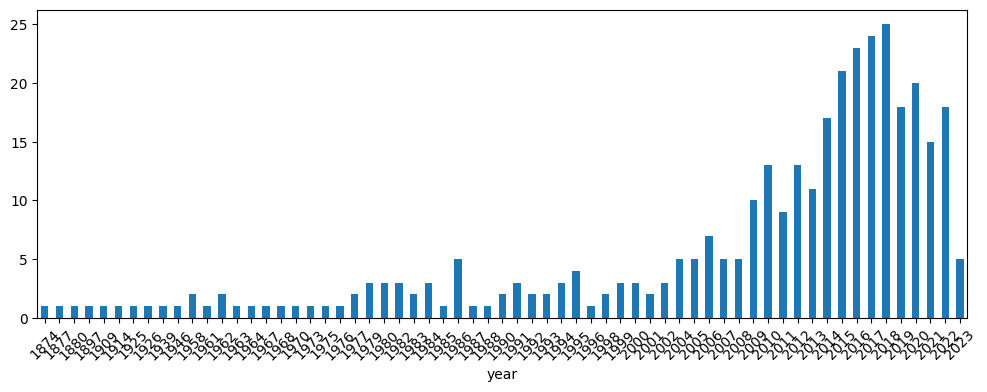

In [31]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot()
ax = df.groupby("year").count().title.plot(kind="bar", ax=ax)
ax.tick_params(axis='x', rotation=45)

In [91]:
count = df.groupby("date").size()#.reset_index()
count = count.sort_index()
count_missing = count.asfreq("M", method="ffill")